# **Model Building**

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px




In [21]:
#Load the preprocessed dataset
df = pd.read_csv(r"F:\youtube_ad\clean_youtube_data.csv")
print("Cleaned dataset loaded successfully")
print(df.head())

Cleaned dataset loaded successfully
      views     likes  comments  watch_time_minutes  video_length_minutes  \
0 -0.638847  0.239775  0.360982           -0.872393             -1.627204   
1  0.171818 -0.903658  0.566579           -1.764055              0.954887   
2  0.972474  1.736705 -0.690726            1.563477              1.259475   
3  0.341957  0.180530 -0.255809           -0.490266             -0.525371   
4 -1.109233  1.497749  1.602472           -1.728039             -1.160443   

   subscribers  category  device  country  ad_revenue_usd  upload_month  \
0    -0.950903         1       2        3      203.178237             9   
1     0.810515         2       3        1      140.880508             9   
2    -0.907735         0       2        1      360.134008            11   
3    -0.235154         1       1        4      224.638261             1   
4    -1.596116         0       1        1      165.514388             4   

   upload_dayofweek  upload_day  engagement_rate  

In [22]:
df

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd,upload_month,upload_dayofweek,upload_day,engagement_rate,watch_ratio
0,-0.638847,0.239775,3.609822e-01,-0.872393,-1.627204,-0.950903,1,2,3,203.178237,9,1,24,0.339207,1.557181
1,0.171818,-0.903658,5.665792e-01,-1.764055,0.954887,0.810515,2,3,1,140.880508,9,6,22,-0.743237,-0.826693
2,0.972474,1.736705,-6.907257e-01,1.563477,1.259475,-0.907735,0,2,1,360.134008,11,3,21,1.478520,-0.398590
3,0.341957,0.180530,-2.558089e-01,-0.490266,-0.525371,-0.235154,1,1,4,224.638261,1,1,28,0.103813,-0.267477
4,-1.109233,1.497749,1.602472e+00,-1.728039,-1.160443,-1.596116,0,1,1,165.514388,4,0,28,1.892665,-0.350857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,-1.469529,1.132404,-1.007029e+00,0.358242,1.171603,-1.010786,0,3,5,280.986396,12,5,14,0.907127,-0.547302
119996,1.282729,1.203498,-1.671265e+00,1.581729,0.026126,1.305878,4,0,4,354.612981,7,5,13,0.720110,-0.022708
119997,2.673870,-0.789117,4.494937e-16,-0.789250,0.965313,0.258229,5,3,1,203.643106,6,0,10,-0.814770,-0.684019
119998,2.403648,1.019838,-1.331239e+00,1.534622,-1.022254,0.287297,4,1,4,351.525811,12,6,22,0.589810,1.028749


In [23]:
from sklearn.model_selection import train_test_split

**1.Split Data into Features and Target**

In [24]:
# X = features, y = target
X = df.drop(columns=['ad_revenue_usd'])  # all columns except target
y = df['ad_revenue_usd']                # target column

X contains all the input features (what the model will use to predict).

y contains the target variable (ad revenue we want to predict).

In [25]:
# Quick check
X.head()
y.head()

0    203.178237
1    140.880508
2    360.134008
3    224.638261
4    165.514388
Name: ad_revenue_usd, dtype: float64

**2.Split Data into Training and Testing Sets**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((96000, 14), (24000, 14), (96000,), (24000,))

Training data → used to train the model.        |      Testing data → used to check model performance on unseen data.

test_size=0.2 → 20% of data for testing.        |      random_state=42 → ensures reproducibility.

### **MODEL BUILDING AND EVALUATION**

In [28]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import plotly.express as px

In [29]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, random_state=42)
}

In [30]:
# Store results
results = []

In [31]:
# Train and evaluate each model
for name, model in models.items():  # Initialize the model

    model.fit(X_train, y_train)     # Train the model
    y_pred = model.predict(X_test)   # Predict on test set

    r2 = r2_score(y_test, y_pred)     # Evaluate performance
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    results.append([name, r2, rmse, mae])

In [32]:
# Create DataFrame
results_df = pd.DataFrame(results, columns=["Model", "R2", "RMSE", "MAE"])

In [33]:
# Sort by best R²
results_df = results_df.sort_values(by="R2", ascending=False)
print(results_df)

               Model        R2       RMSE       MAE
2              Lasso  0.952591  13.477590  3.083480
1              Ridge  0.952587  13.478162  3.092431
0  Linear Regression  0.952585  13.478450  3.094299
4  Gradient Boosting  0.952190  13.534544  3.648658
3      Random Forest  0.950849  13.723056  3.520470


#### **1️⃣ Linear Regression**

Linear Regression assumes a linear relationship between features and ad revenue.

R² shows how much variance in revenue is explained.

RMSE & MAE give average prediction error.

#### **2️⃣ Ridge Regression**

Ridge adds L2 regularization to reduce overfitting.

Useful if some features are highly correlated.

#### **3️⃣ Lasso Regression**

Lasso adds L1 regularization, which can shrink some coefficients to zero (feature selection).

#### **4️⃣ Random Forest Regressor**

Random Forest is an ensemble of decision trees.

Handles non-linear relationships well and robust to outliers.

Usually performs better than linear models on complex data.

#### **5️⃣ Gradient Boosting Regressor**

Gradient Boosting builds trees sequentially, each one fixing errors from the previous.

Very effective for complex non-linear patterns.

#### **6️⃣ Compare Model Performance**

C:\Users\Admin\AppData\Local\Temp\ipykernel_12776\4249108456.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df, palette="viridis", ax=ax)
C:\Users\Admin\AppData\Local\Temp\ipykernel_12776\4249108456.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(results_df["Model"], rotation=45, ha="right")
C:\Users\Admin\AppData\Local\Temp\ipykernel_12776\4249108456.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df, palette="viridis", ax=ax)
C:\Users\Admin\AppData\Local\Temp\ipykernel_12776\4249108456.py:8: UserWarning: se

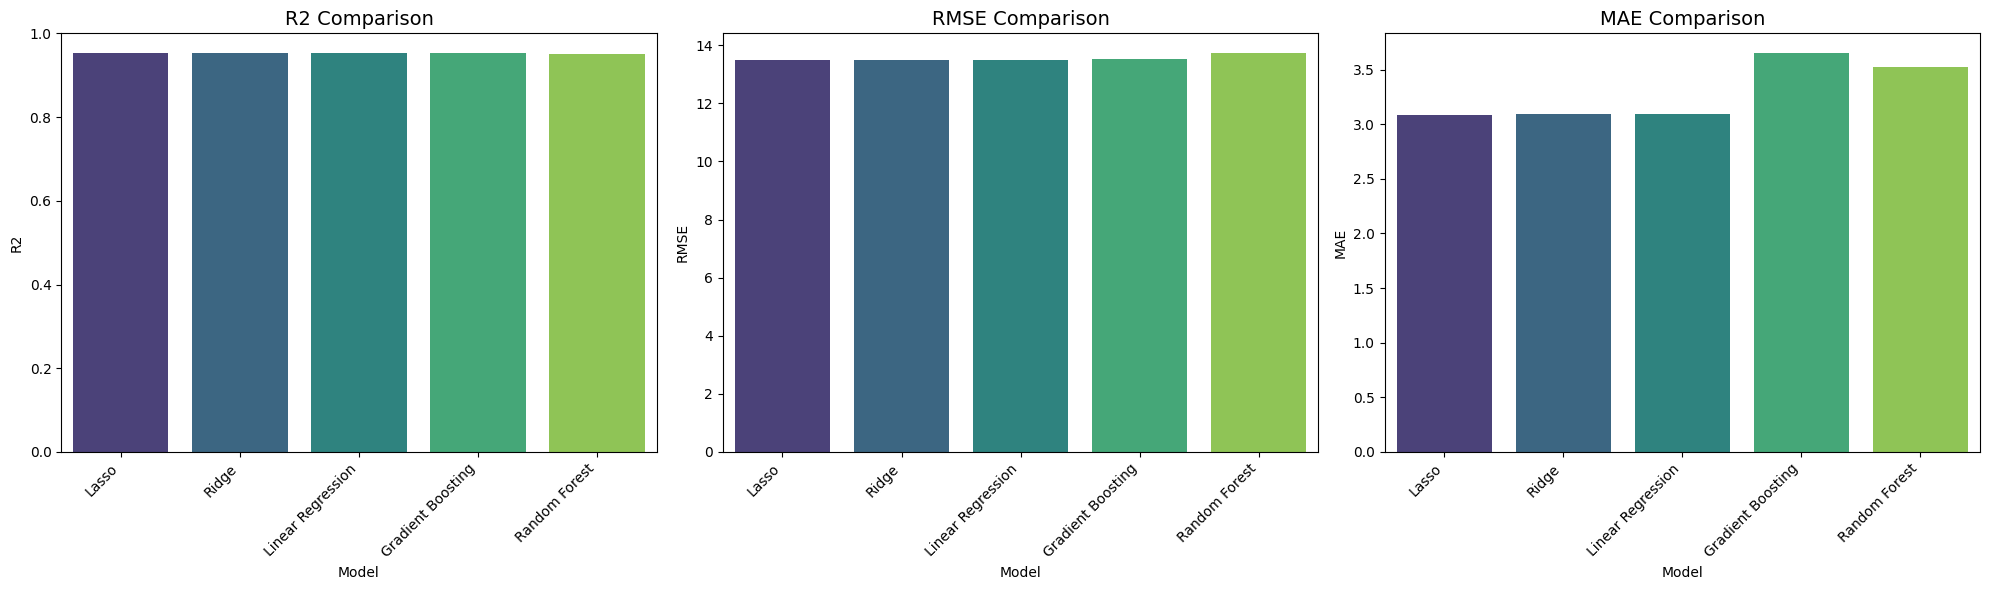

In [45]:
metrics = ["R2", "RMSE", "MAE"]

fig, axes = plt.subplots(1, 3, figsize=(20,6))  # 1 row, 3 columns

for ax, metric in zip(axes, metrics):
    sns.barplot(x="Model", y=metric, data=results_df, palette="viridis", ax=ax)
    ax.set_title(f"{metric} Comparison", fontsize=14)
    ax.set_xticklabels(results_df["Model"], rotation=45, ha="right")

plt.tight_layout()
plt.show()

#### **7️⃣Feature Importance**

C:\Users\Admin\AppData\Local\Temp\ipykernel_12776\2547983379.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients.values, y=coefficients.index, palette="viridis")


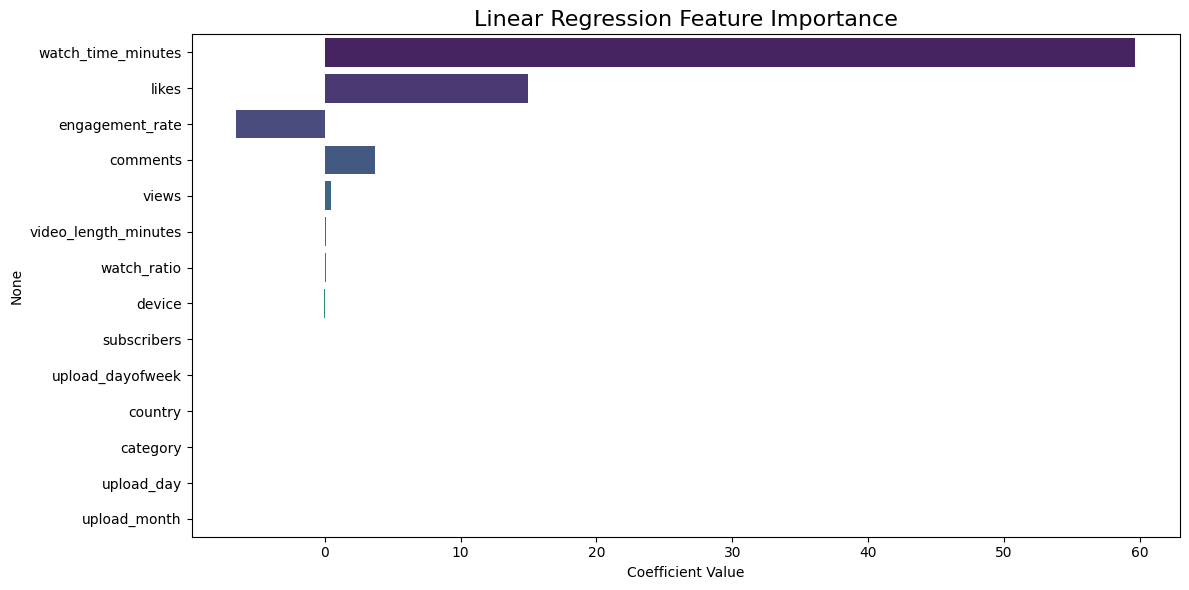

Top 10 Features driving ad revenue (Linear Regression):
watch_time_minutes      59.663711
likes                   14.964115
engagement_rate         -6.504929
comments                 3.702565
views                    0.488103
video_length_minutes     0.065435
watch_ratio              0.057173
device                  -0.043264
subscribers              0.027123
upload_dayofweek         0.015341
dtype: float64


In [42]:
# ----------------------------
# Feature Importance - Linear Regression
# ----------------------------
lr_model = models["Linear Regression"]  # your trained Linear Regression model
coefficients = pd.Series(lr_model.coef_, index=X.columns).sort_values(key=abs, ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=coefficients.values, y=coefficients.index, palette="viridis")
plt.title("Linear Regression Feature Importance", fontsize=16)
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()

print("Top 10 Features driving ad revenue (Linear Regression):")
print(coefficients.head(10))

